# Ethiopia Financial Inclusion Analysis

This notebook presents a comprehensive analysis of the Ethiopia Financial Inclusion dataset. It covers dataset structure, access and usage trends, infrastructure enablers, event timelines, and correlation analysis.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 0. Load and Preprocess Data

In [2]:
# Load the dataset
file_path = "../data/raw/ethiopia_fi_unified_data.csv"
df = pd.read_csv(file_path)

# Convert date columns to datetime
# Based on user feedback, observation_date is the main date column
date_cols = ['observation_date', 'period_start', 'period_end', 'collection_date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Derive year from observation_date
if 'observation_date' in df.columns:
    df['year'] = df['observation_date'].dt.year

# Display first few rows
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14920\1654189288.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,parent_id,year
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaT,Baseline year,NaN,NaN,2014
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaT,NaN,NaN,NaN,2017
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaT,NaN,NaN,NaN,2021
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaT,Gender disaggregated,NaN,NaN,2021
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,Example_Trainee,2025-01-20 00:00:00,NaT,Gender disaggregated,NaN,NaN,2021


## 1. Dataset Overview

### Summary by Record Type, Pillar, and Source Type

In [3]:
print("Records by Type:")
print(df['record_type'].value_counts())
print("\nRecords by Pillar:")
print(df['pillar'].value_counts())
print("\nRecords by Source Type:")
print(df['source_type'].value_counts())

Records by Type:
record_type
observation    30
impact_link    14
event          10
target          3
Name: count, dtype: int64

Records by Pillar:
pillar
ACCESS           20
USAGE            17
GENDER            6
AFFORDABILITY     4
Name: count, dtype: int64

Records by Source Type:
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


### Temporal Coverage Visualization

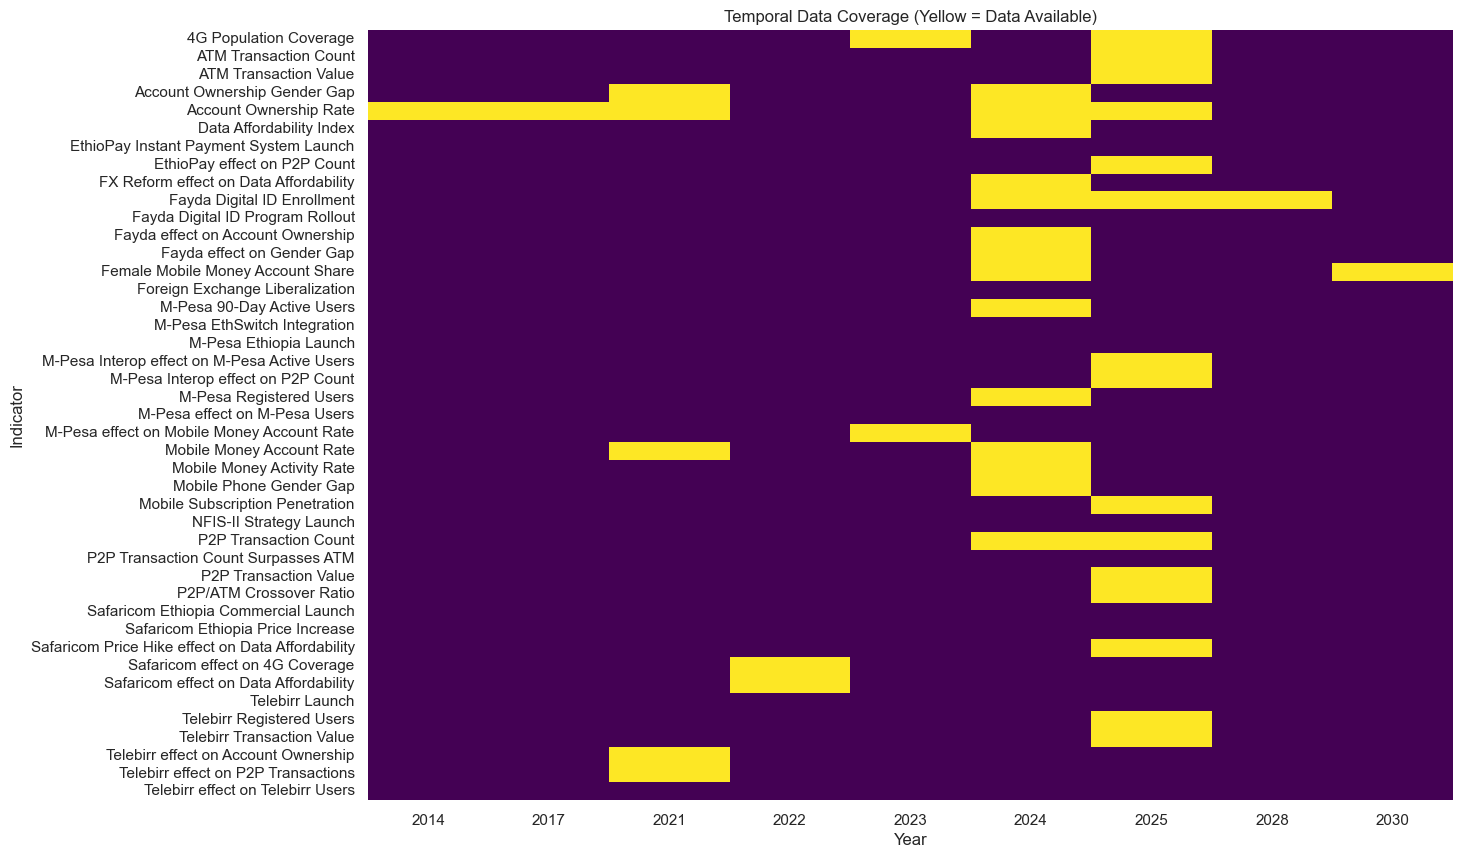

In [4]:
# Pivot table for heatmap: Indicators vs Years
coverage = df.pivot_table(index='indicator', columns='year', values='value_numeric', aggfunc='count')
plt.figure(figsize=(14, 10))
sns.heatmap(coverage > 0, cmap='viridis', cbar=False)
plt.title('Temporal Data Coverage (Yellow = Data Available)')
plt.xlabel('Year')
plt.ylabel('Indicator')
plt.show()

### Data Quality: Confidence Levels

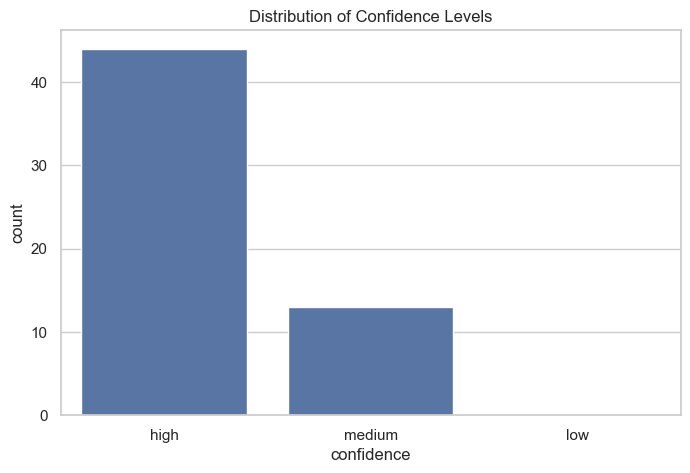

In [5]:
if 'confidence' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='confidence', data=df, order=['high', 'medium', 'low'])
    plt.title('Distribution of Confidence Levels')
    plt.show()
else:
    print("Confidence column not found.")

## 2. Access Analysis

### Account Ownership Trajectory (2011-2024)

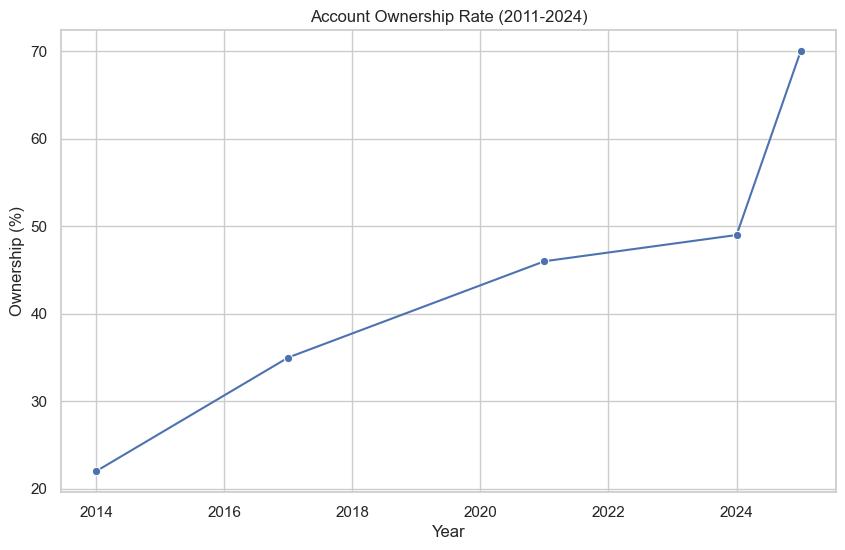

In [6]:
# Filter for Account Ownership
# Using 'all' for both gender and location to find national aggregates
acc_ownership = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') & 
    (df['gender'] == 'all') & 
    (df['location'] == 'national')
].sort_values('year')

plt.figure(figsize=(10, 6))
sns.lineplot(data=acc_ownership, x='year', y='value_numeric', marker='o')
plt.title('Account Ownership Rate (2011-2024)')
plt.ylabel('Ownership (%)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

### Growth Rates

In [7]:
acc_ownership['pct_change'] = acc_ownership['value_numeric'].pct_change() * 100
print(acc_ownership[['year', 'value_numeric', 'pct_change']])

    year  value_numeric  pct_change
0   2014           22.0         NaN
1   2017           35.0   59.090909
2   2021           46.0   31.428571
5   2024           49.0    6.521739
30  2025           70.0   42.857143


### Disaggregated Analysis: Gender

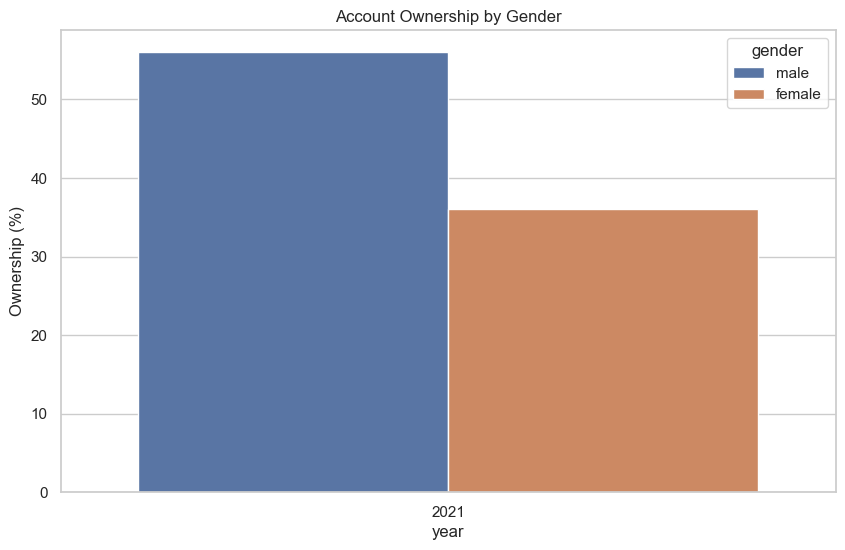

In [8]:
gender_acc = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') & 
    (df['gender'].isin(['male', 'female']))
]

if not gender_acc.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=gender_acc, x='year', y='value_numeric', hue='gender')
    plt.title('Account Ownership by Gender')
    plt.ylabel('Ownership (%)')
    plt.show()
else:
    print("No gender disaggregated data found for Account Ownership.")

### Disaggregated Analysis: Location

In [9]:
loc_acc = df[
    (df['indicator_code'] == 'ACC_OWNERSHIP') & 
    (df['location'].isin(['urban', 'rural']))
]

if not loc_acc.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=loc_acc, x='year', y='value_numeric', hue='location')
    plt.title('Account Ownership by Location')
    plt.ylabel('Ownership (%)')
    plt.show()
else:
    print("No location disaggregated data found for Account Ownership.")

No location disaggregated data found for Account Ownership.


## 3. Usage (Digital Payments) Analysis

### Mobile Money and Digital Payments

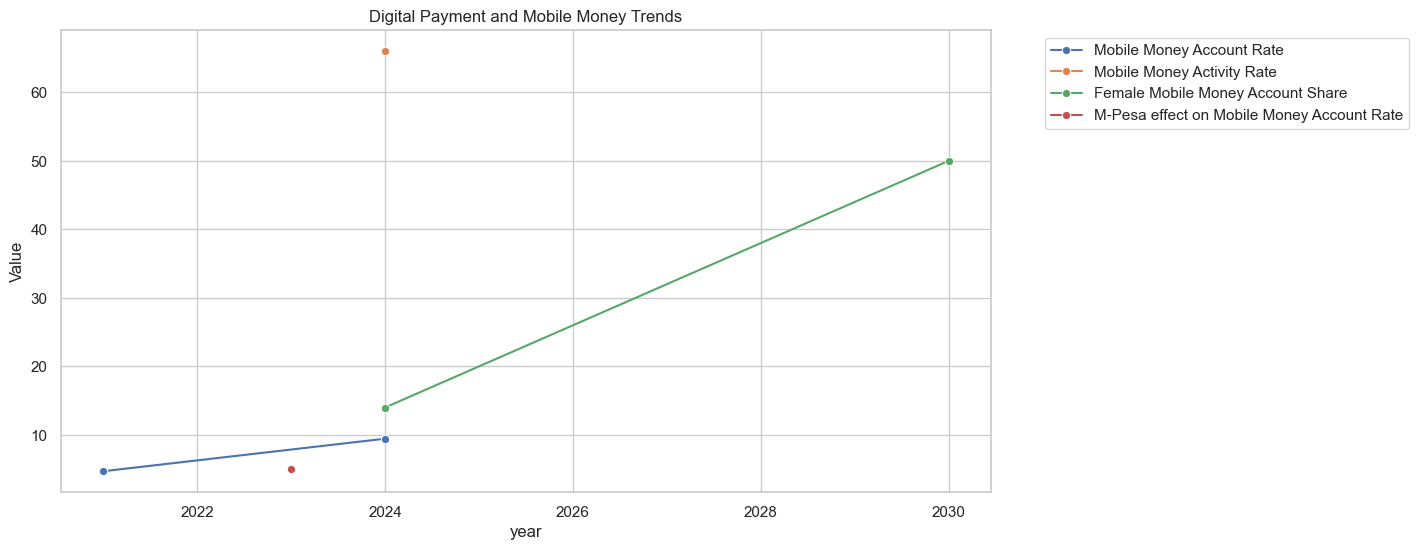

In [10]:
# Filter for Mobile Money or Digital Payment indicators
usage_indicators = df[df['indicator'].str.contains('Mobile Money|Digital Payment', case=False, na=False)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=usage_indicators, x='year', y='value_numeric', hue='indicator', marker='o')
plt.title('Digital Payment and Mobile Money Trends')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 4. Infrastructure and Enablers

### Infrastructure metrics (4G, ATMs, etc.)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14920\550322992.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


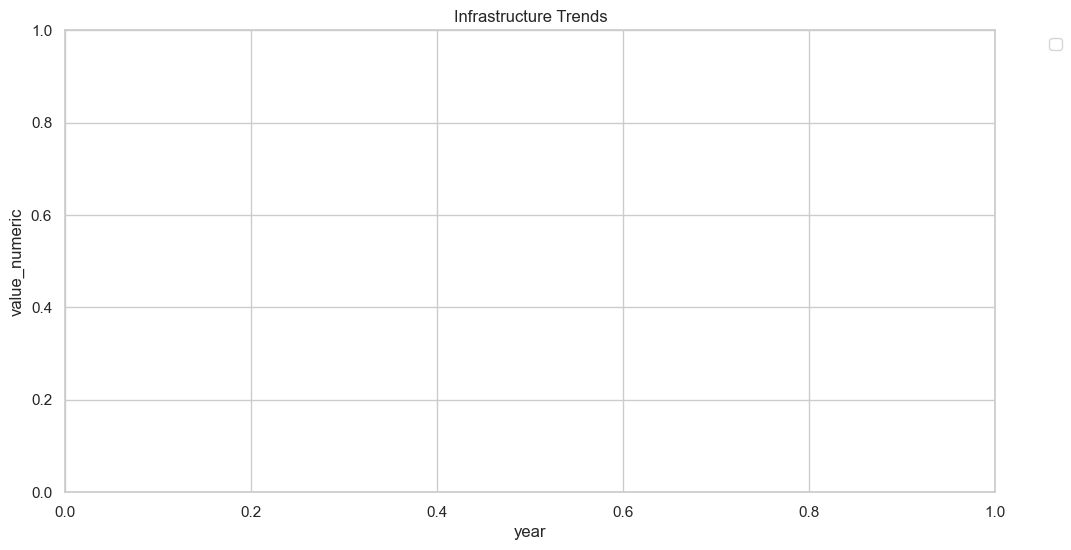

In [16]:
infra_indicators = df[df['pillar'] == 'infrastructure']

plt.figure(figsize=(12, 6))
sns.lineplot(data=infra_indicators, x='year', y='value_numeric', hue='indicator', marker='o')
plt.title('Infrastructure Trends')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## 5. Event Timeline and Visual Analysis

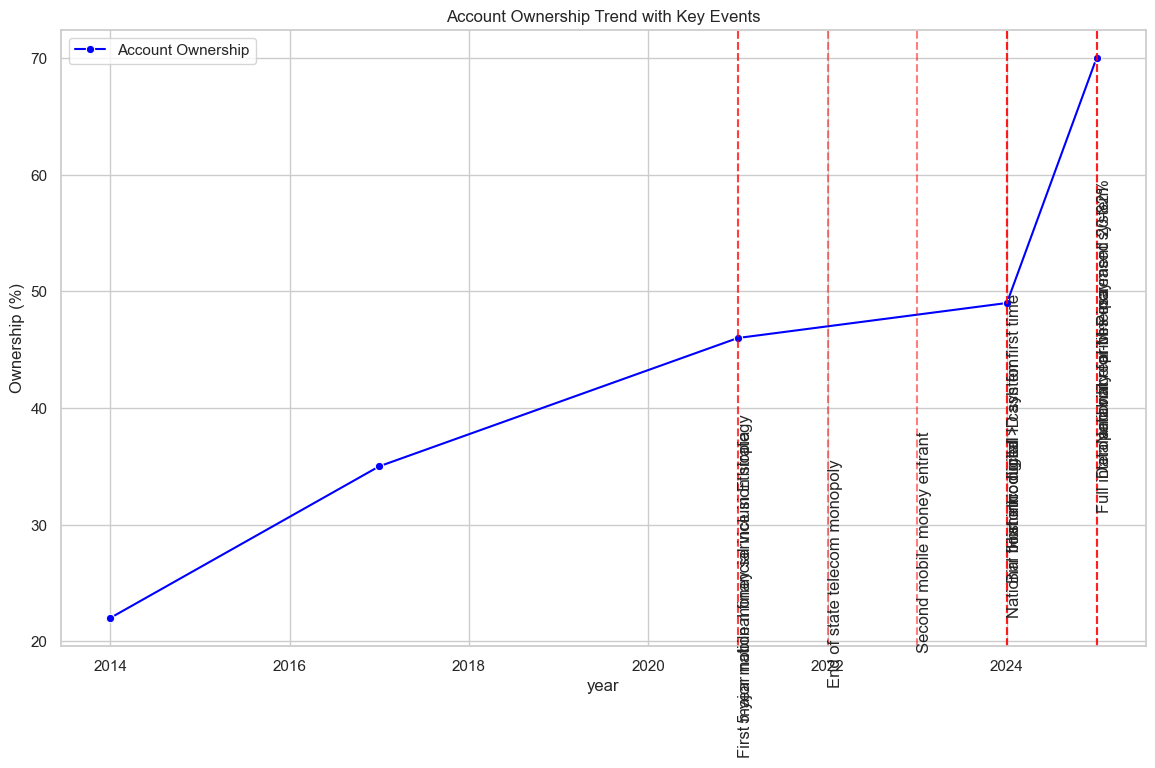

Key Events List:
   observation_date                                 original_text record_id
33       2021-05-17  First major mobile money service in Ethiopia  EVT_0001
41       2021-09-01  5-year national financial inclusion strategy  EVT_0009
34       2022-08-01                 End of state telecom monopoly  EVT_0002
35       2023-08-01                   Second mobile money entrant  EVT_0003
36       2024-01-01          National biometric digital ID system  EVT_0004
37       2024-07-29                         Birr float introduced  EVT_0005
38       2024-10-01       Historic: digital > cash for first time  EVT_0006
39       2025-10-27              Full interoperability for M-Pesa  EVT_0007
42       2025-12-15        Data and voice prices increased 20-82%  EVT_0010
40       2025-12-18             National real-time payment system  EVT_0008


In [12]:
events = df[df['record_type'] == 'event'].sort_values('observation_date')

plt.figure(figsize=(14, 8))
# Plot Access trend again as background
sns.lineplot(data=acc_ownership, x='year', y='value_numeric', marker='o', label='Account Ownership', color='blue')

# Overlay events
for idx, (index, row) in enumerate(events.iterrows()):
    if pd.notnull(row['observation_date']):
        plt.axvline(x=row['observation_date'].year, color='red', linestyle='--', alpha=0.5)
        # Use original_text or record_id for label
        label = row['original_text'] if pd.notnull(row['original_text']) else row['record_id']
        plt.text(row['observation_date'].year, idx*3 + 10, label, rotation=90, verticalalignment='bottom')

plt.title('Account Ownership Trend with Key Events')
plt.ylabel('Ownership (%)')
plt.legend()
plt.show()

print("Key Events List:")
print(events[['observation_date', 'original_text', 'record_id']])

## 6. Correlation Analysis

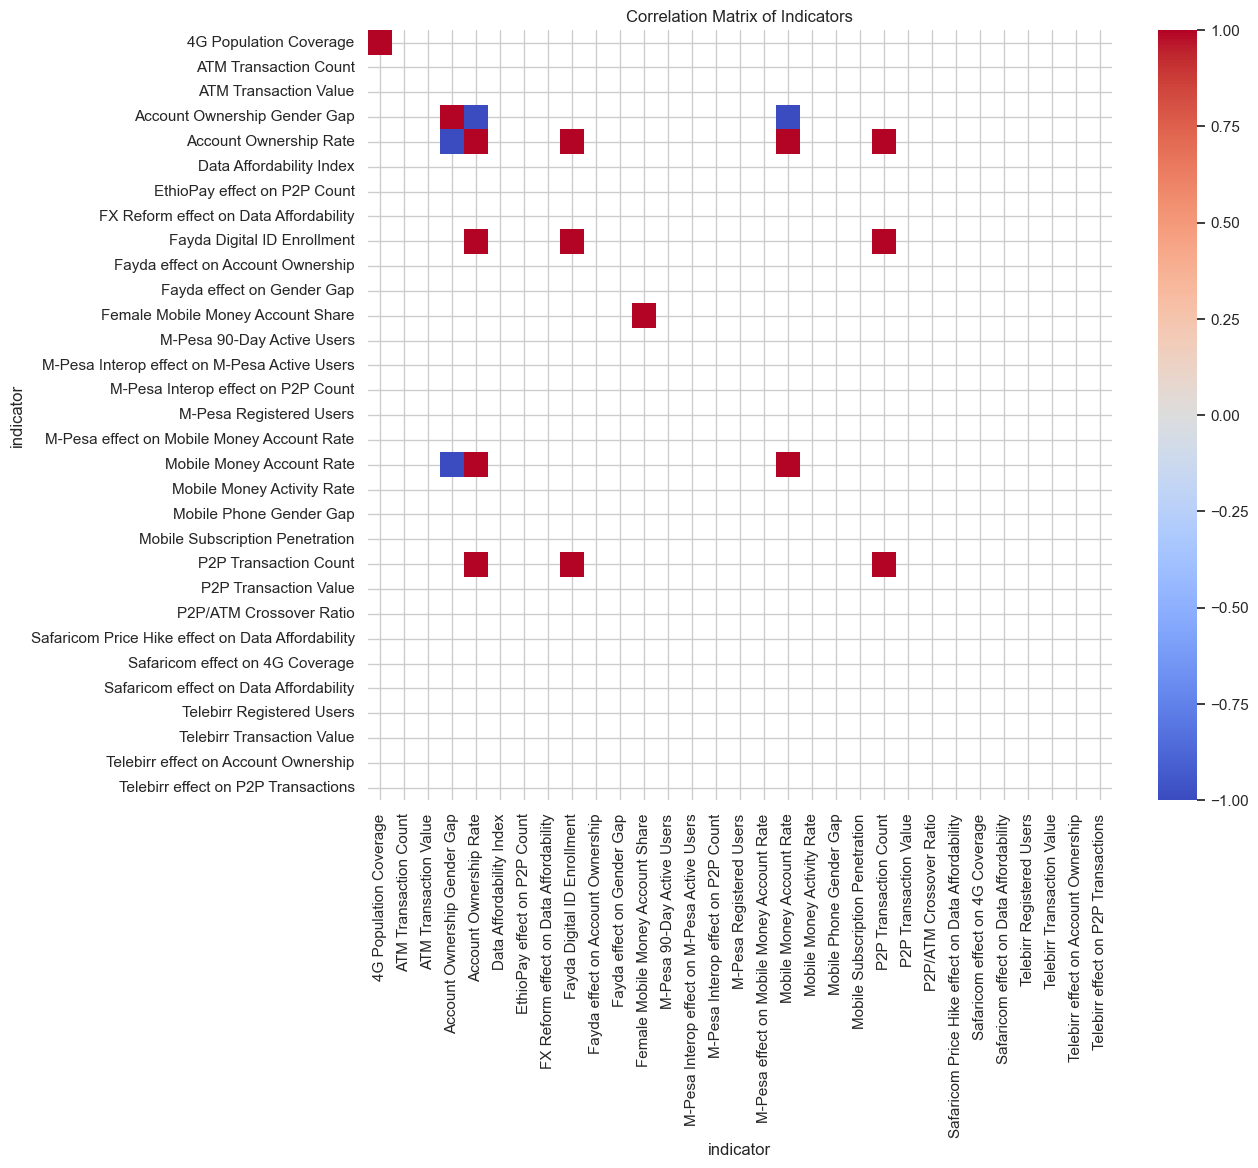

In [13]:
# Pivot data for correlation
pivot_df = df.pivot_table(index='year', columns='indicator', values='value_numeric')

# Calculate correlation matrix
corr_matrix = pivot_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Indicators')
plt.show()

### Top Correlations with Account Ownership

In [14]:
target = 'Account Ownership Rate'
if target in corr_matrix.columns:
    print(corr_matrix[target].sort_values(ascending=False))
else:
    print(f"Target indicator '{target}' not found in correlation matrix columns.")

indicator
Mobile Money Account Rate                            1.0
Fayda Digital ID Enrollment                          1.0
Account Ownership Rate                               1.0
P2P Transaction Count                                1.0
Account Ownership Gender Gap                        -1.0
4G Population Coverage                               NaN
ATM Transaction Count                                NaN
ATM Transaction Value                                NaN
Data Affordability Index                             NaN
EthioPay effect on P2P Count                         NaN
FX Reform effect on Data Affordability               NaN
Fayda effect on Account Ownership                    NaN
Fayda effect on Gender Gap                           NaN
Female Mobile Money Account Share                    NaN
M-Pesa 90-Day Active Users                           NaN
M-Pesa Interop effect on M-Pesa Active Users         NaN
M-Pesa Interop effect on P2P Count                   NaN
M-Pesa Registered Use